In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
use_cuda = torch.cuda.is_available()

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
all_data = pd.concat((train.loc[:,'appearedTimeOfDay':'cooc_151'],
                      test.loc[:,'appearedTimeOfDay':'cooc_151']))
id = test['id']

In [4]:
all_data.head()

,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,...,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151
0,evening,19,10,13,False,Bangkok,Asia,Clear,27.8,9.00,...,False,False,False,False,False,False,False,False,False,False
1,night,5,19,13,True,New_York,America,Clear,26.1,8.70,...,False,False,False,False,False,False,False,False,False,False
2,evening,19,46,0,True,New_York,America,Clear,24.7,16.82,...,False,False,False,False,False,False,False,False,False,False
3,morning,11,10,0,True,Hobart,Australia,Clear,12.7,13.25,...,False,False,False,False,False,False,False,False,False,False
4,evening,18,32,13,True,Los_Angeles,America,PartlyCloudy,19.1,5.78,...,False,False,False,False,False,False,False,False,False,False


In [5]:
all_data = all_data.applymap(lambda x: 1.0 if x == True else x)
all_data = all_data.applymap(lambda x: 0.0 if x == False else x)
all_data = pd.get_dummies(all_data)
# numeric_feats = df.dtypes[df.dtypes != "object"].index
# df = df[numeric_feats]
apearedHour = all_data['appearedHour']
appearedMinute = all_data['appearedMinute']
appearedTimeDayCycle = apearedHour * 60 + appearedMinute
appearedTimeDayCycle = np.sin(appearedTimeDayCycle / (24 * 60) * 2 * np.pi)
# print('appearedTimeDayCycle= ',appearedTimeDayCycle)
all_data = all_data.drop(['appearedHour'], axis=1)
all_data = all_data.drop(['appearedMinute'], axis=1)
all_data['appearedTimeDayCycle'] = appearedTimeDayCycle

# df = df.drop(['temperature'], axis=1)
# df = df.drop(['windSpeed'], axis=1)
# df = df.drop(['pressure'], axis=1)
# df = df.drop(['gymIn100m'], axis=1)
# df = df.drop(['gymIn250m'], axis=1)
# df = df.drop(['gymIn500m'], axis=1)
# df = df.drop(['gymIn1000m'], axis=1)
# df = df.drop(['gymIn2500m'], axis=1)
# df = df.drop(['gymIn5000m'], axis=1)
# df = df.drop(['rural'], axis=1)
# df = df.drop(['midurban'], axis=1)
# df = df.drop(['suburban'], axis=1)
# df = df.drop(['urban'], axis=1)
# df = df.drop(['pokestopIn100m'], axis=1)
# df = df.drop(['pokestopIn250m'], axis=1)
# df = df.drop(['pokestopIn500m'], axis=1)
# df = df.drop(['pokestopIn1000m'], axis=1)
# df = df.drop(['pokestopIn2500m'], axis=1)
# df = df.drop(['pokestopIn5000m'], axis=1)
# df = df.drop(['terrainType'], axis=1)
# df = df.drop(['closeToWater'], axis=1)


In [6]:
all_data.head()

,terrainType,closeToWater,temperature,windSpeed,pressure,population_density,urban,suburban,midurban,rural,...,weather_WindyandPartlyCloudy,weatherIcon_clear-day,weatherIcon_clear-night,weatherIcon_cloudy,weatherIcon_fog,weatherIcon_partly-cloudy-day,weatherIcon_partly-cloudy-night,weatherIcon_rain,weatherIcon_wind,appearedTimeDayCycle
0,13.0,0.0,27.8,9.00,1008.96,6019.04440,1.0,1.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,-0.953717
1,13.0,1.0,26.1,8.70,1018.96,0.00000,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0.984041
2,0.0,1.0,24.7,16.82,1023.22,0.00000,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,-0.894934
3,0.0,1.0,12.7,13.25,1014.19,128.89505,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0.216440
4,13.0,1.0,19.1,5.78,1011.36,4188.39100,1.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,-0.990268


In [7]:
list(all_data.columns.values)

['terrainType',
 'closeToWater',
 'temperature',
 'windSpeed',
 'pressure',
 'population_density',
 'urban',
 'suburban',
 'midurban',
 'rural',
 'gymDistanceKm',
 'gymIn100m',
 'gymIn250m',
 'gymIn500m',
 'gymIn1000m',
 'gymIn2500m',
 'gymIn5000m',
 'pokestopDistanceKm',
 'pokestopIn100m',
 'pokestopIn250m',
 'pokestopIn500m',
 'pokestopIn1000m',
 'pokestopIn2500m',
 'pokestopIn5000m',
 'cooc_1',
 'cooc_2',
 'cooc_3',
 'cooc_4',
 'cooc_5',
 'cooc_6',
 'cooc_7',
 'cooc_8',
 'cooc_9',
 'cooc_10',
 'cooc_11',
 'cooc_12',
 'cooc_13',
 'cooc_14',
 'cooc_15',
 'cooc_16',
 'cooc_17',
 'cooc_18',
 'cooc_19',
 'cooc_20',
 'cooc_21',
 'cooc_22',
 'cooc_23',
 'cooc_24',
 'cooc_25',
 'cooc_26',
 'cooc_27',
 'cooc_28',
 'cooc_29',
 'cooc_30',
 'cooc_31',
 'cooc_32',
 'cooc_33',
 'cooc_34',
 'cooc_35',
 'cooc_36',
 'cooc_37',
 'cooc_38',
 'cooc_39',
 'cooc_40',
 'cooc_41',
 'cooc_42',
 'cooc_43',
 'cooc_44',
 'cooc_45',
 'cooc_46',
 'cooc_47',
 'cooc_48',
 'cooc_49',
 'cooc_50',
 'cooc_51',
 'cooc_

In [8]:
#let's look at the data :
# matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

# data = pd.DataFrame({"x":df['population_density'], "y":targets})

# data.plot(x = "x", y = "y",kind = "scatter")

In [9]:
#normailize to 0-1
for k in all_data.columns.values:
    if (all_data[k].max() - all_data[k].min()) > 0:
        all_data[k] = (all_data[k] - all_data[k].min())/(all_data[k].max() - all_data[k].min())
    else:
        all_data[k] = 0

In [10]:
all_data.head()

,terrainType,closeToWater,temperature,windSpeed,pressure,population_density,urban,suburban,midurban,rural,...,weather_WindyandPartlyCloudy,weatherIcon_clear-day,weatherIcon_clear-night,weatherIcon_cloudy,weatherIcon_fog,weatherIcon_partly-cloudy-day,weatherIcon_partly-cloudy-night,weatherIcon_rain,weatherIcon_wind,appearedTimeDayCycle
0,0.8125,0.0,0.631868,0.160342,0.333774,0.601904,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023142
1,0.8125,1.0,0.585165,0.154997,0.598044,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.992020
2,0.0000,1.0,0.546703,0.299662,0.710624,0.000000,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052533
3,0.0000,1.0,0.217033,0.236059,0.471987,0.012890,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.608220
4,0.8125,1.0,0.392857,0.102975,0.397199,0.418839,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.004866


In [11]:
features = all_data[:train.shape[0]]
features_test = all_data[train.shape[0]:]
targets = train['class']

features.info()
features.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7160 entries, 0 to 7159
Columns: 297 entries, terrainType to appearedTimeDayCycle
dtypes: float64(272), int64(25)
memory usage: 16.3 MB


(7160, 297)

In [12]:
from sklearn.model_selection import train_test_split

train_ratio = 0.7
test_ratio = 0.2
# split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(features.values, targets.values, test_size = 1 - train_ratio, stratify=targets, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size = test_ratio, stratify=y_valid, random_state=0)
X_train.shape,X_valid.shape,X_test.shape

((5011, 297), (1719, 297), (430, 297))

In [13]:
print(type(y_train))

<class 'numpy.ndarray'>


In [14]:
import torch.utils.data as data_utils

data_train = data_utils.TensorDataset(torch.from_numpy(X_train).type((torch.FloatTensor)), torch.from_numpy(y_train).type((torch.LongTensor)))
data_valid = data_utils.TensorDataset(torch.from_numpy(X_valid).type((torch.FloatTensor)), torch.from_numpy(y_valid).type((torch.LongTensor)))
data_test = data_utils.TensorDataset(torch.from_numpy(X_test).type((torch.FloatTensor)), torch.from_numpy(y_test).type((torch.LongTensor)))

In [15]:
# how many data per batch to load
batch_size = 10000

# convert data to torch.FloatTensor

loaders = {}
loaders['train'] = torch.utils.data.DataLoader(data_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=1)

loaders['valid'] = torch.utils.data.DataLoader(data_valid,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=1)
loaders['test'] = torch.utils.data.DataLoader(data_test,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=1)

In [16]:
# for batch_idx, (data, target) in enumerate(loaders['train']):
#     print(target)

In [17]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(297, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 6)


    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = F.sigmoid(self.fc3(x))      
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model = Net()
def init_weights(m):
        print(m)
        if type(m) == nn.Linear:
            m.weight.data.fill_(1.0)
            print(m.weight)
            
def init_ortho(m):
    print()
    if type(m) == nn.Linear:
        nn.init.orthogonal_(m.weight)
        print(m.weight)

# use the modules apply function to recursively apply the initialization
model.apply(init_ortho)

# move tensors to GPU if CUDA is available
if use_cuda:
    model.cuda()


Parameter containing:
tensor([[ 0.0233, -0.0325, -0.0062,  ..., -0.0320,  0.0038,  0.0225],
        [-0.0242,  0.0572, -0.0361,  ...,  0.0622,  0.0251,  0.0570],
        [-0.0937, -0.0119,  0.1357,  ...,  0.1245,  0.0335,  0.0456],
        ...,
        [ 0.0549, -0.0355,  0.1440,  ..., -0.0357,  0.0642,  0.0022],
        [-0.0075, -0.0814,  0.0595,  ..., -0.0344,  0.0920, -0.0158],
        [-0.0767, -0.0262, -0.0950,  ..., -0.0682, -0.1542,  0.0476]],
       requires_grad=True)

Parameter containing:
tensor([[-0.0003,  0.0522,  0.0893,  ..., -0.0173,  0.0893,  0.1234],
        [ 0.1271,  0.0833,  0.0874,  ...,  0.0533,  0.0662,  0.0416],
        [-0.0167,  0.0110, -0.0350,  ..., -0.0151, -0.0160,  0.0544],
        ...,
        [ 0.0349,  0.1136,  0.0027,  ..., -0.0852, -0.1912, -0.0159],
        [ 0.0788,  0.1191,  0.0437,  ...,  0.0625,  0.0585,  0.0114],
        [ 0.0367,  0.0640, -0.0974,  ..., -0.0875,  0.0224,  0.0321]],
       requires_grad=True)

Parameter containing:
tensor([[

In [18]:
import torch.optim as optim

### TODO: select loss function
criterion = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)
# optimizer = optim.SGD(model.parameters(), lr=0.01,weight_decay= 1e-6, momentum = 0.9, nesterov = True)
# optimizer = optim.SGD(model.parameters(), lr=0.01)

In [19]:
import time

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        start = time.time()
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):

#             data = data.type((torch.FloatTensor))

            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update accumulated training loss
            train_loss += loss.item()*data.size(0)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            
#             data = data.type((torch.FloatTensor))
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update accumulated validation loss 
            valid_loss += loss.item()*data.size(0)
            

        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \t time: {:.1f}'.format(
            epoch, 
            train_loss,
            valid_loss,
            time.time() - start
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased from {:.6f} to {:.6f}. Model was saved'.format(
                valid_loss_min,
                valid_loss
            ))
            
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    
    # return trained model
    return model


# train the model
model = train(200, loaders, model, optimizer, 
                      criterion, use_cuda, 'model.pt')

/Users/huohsien/anaconda2/envs/ai/lib/python3.7/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 1 	Training Loss: 1.794860 	Validation Loss: 1.763647 	 time: 0.2
Validation loss decreased from inf to 1.763647. Model was saved
Epoch: 2 	Training Loss: 1.763481 	Validation Loss: 1.756019 	 time: 0.2
Validation loss decreased from 1.763647 to 1.756019. Model was saved
Epoch: 3 	Training Loss: 1.755777 	Validation Loss: 1.756446 	 time: 0.2
Epoch: 4 	Training Loss: 1.756172 	Validation Loss: 1.757411 	 time: 0.2
Epoch: 5 	Training Loss: 1.757108 	Validation Loss: 1.757516 	 time: 0.2
Epoch: 6 	Training Loss: 1.757203 	Validation Loss: 1.757095 	 time: 0.2
Epoch: 7 	Training Loss: 1.756773 	Validation Loss: 1.756471 	 time: 0.2
Epoch: 8 	Training Loss: 1.756124 	Validation Loss: 1.755636 	 time: 0.2
Validation loss decreased from 1.756019 to 1.755636. Model was saved
Epoch: 9 	Training Loss: 1.755231 	Validation Loss: 1.754478 	 time: 0.2
Validation loss decreased from 1.755636 to 1.754478. Model was saved
Epoch: 10 	Training Loss: 1.753985 	Validation Loss: 1.752968 	 time: 0.

Epoch: 61 	Training Loss: 1.427428 	Validation Loss: 1.473757 	 time: 0.2
Validation loss decreased from 1.474692 to 1.473757. Model was saved
Epoch: 62 	Training Loss: 1.425577 	Validation Loss: 1.472968 	 time: 0.2
Validation loss decreased from 1.473757 to 1.472968. Model was saved
Epoch: 63 	Training Loss: 1.423835 	Validation Loss: 1.472259 	 time: 0.2
Validation loss decreased from 1.472968 to 1.472259. Model was saved
Epoch: 64 	Training Loss: 1.422193 	Validation Loss: 1.471654 	 time: 0.2
Validation loss decreased from 1.472259 to 1.471654. Model was saved
Epoch: 65 	Training Loss: 1.420633 	Validation Loss: 1.471082 	 time: 0.2
Validation loss decreased from 1.471654 to 1.471082. Model was saved
Epoch: 66 	Training Loss: 1.419140 	Validation Loss: 1.470540 	 time: 0.2
Validation loss decreased from 1.471082 to 1.470540. Model was saved
Epoch: 67 	Training Loss: 1.417703 	Validation Loss: 1.470080 	 time: 0.2
Validation loss decreased from 1.470540 to 1.470080. Model was saved

Epoch: 121 	Training Loss: 1.369913 	Validation Loss: 1.458661 	 time: 0.2
Epoch: 122 	Training Loss: 1.369191 	Validation Loss: 1.458517 	 time: 0.3
Validation loss decreased from 1.458622 to 1.458517. Model was saved
Epoch: 123 	Training Loss: 1.368482 	Validation Loss: 1.458623 	 time: 0.2
Epoch: 124 	Training Loss: 1.367771 	Validation Loss: 1.458386 	 time: 0.2
Validation loss decreased from 1.458517 to 1.458386. Model was saved
Epoch: 125 	Training Loss: 1.367070 	Validation Loss: 1.458497 	 time: 0.2
Epoch: 126 	Training Loss: 1.366368 	Validation Loss: 1.458273 	 time: 0.2
Validation loss decreased from 1.458386 to 1.458273. Model was saved
Epoch: 127 	Training Loss: 1.365676 	Validation Loss: 1.458372 	 time: 0.3
Epoch: 128 	Training Loss: 1.364980 	Validation Loss: 1.458128 	 time: 0.3
Validation loss decreased from 1.458273 to 1.458128. Model was saved
Epoch: 129 	Training Loss: 1.364280 	Validation Loss: 1.458300 	 time: 0.3
Epoch: 130 	Training Loss: 1.363587 	Validation L

In [20]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        
#         data = data.type((torch.FloatTensor))
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model.load_state_dict(torch.load('model.pt'))
# call test function    
test(loaders, model, criterion, use_cuda)

Test Loss: 1.431428


Test Accuracy: 56% (244/430)


In [21]:
i,l = next(iter(loaders['test']))
output = model(i)
result = output.data.max(1, keepdim=True)[1].numpy()
result[:,0]

array([2, 0, 4, 2, 3, 0, 3, 2, 0, 5, 2, 2, 0, 0, 0, 5, 5, 2, 5, 0, 0, 5,
       5, 5, 3, 0, 0, 2, 2, 0, 3, 0, 1, 2, 0, 0, 5, 3, 3, 2, 2, 5, 0, 1,
       5, 5, 2, 3, 2, 0, 2, 2, 1, 0, 2, 0, 5, 2, 3, 2, 3, 3, 1, 2, 0, 2,
       3, 0, 3, 1, 5, 2, 0, 5, 2, 2, 3, 0, 3, 3, 1, 0, 2, 5, 0, 5, 2, 3,
       1, 3, 5, 1, 2, 3, 2, 5, 5, 2, 3, 3, 5, 0, 2, 2, 2, 3, 0, 2, 3, 2,
       0, 5, 3, 3, 2, 1, 2, 5, 1, 2, 2, 2, 1, 0, 3, 2, 0, 3, 1, 2, 2, 1,
       2, 3, 2, 5, 2, 2, 1, 2, 2, 0, 0, 2, 3, 4, 5, 3, 5, 5, 2, 5, 5, 0,
       3, 5, 0, 3, 5, 3, 5, 0, 5, 3, 2, 5, 5, 1, 2, 0, 0, 0, 3, 5, 0, 4,
       4, 0, 3, 2, 5, 0, 3, 1, 2, 1, 0, 0, 0, 2, 5, 0, 2, 3, 0, 2, 3, 0,
       5, 0, 1, 1, 2, 0, 2, 3, 2, 5, 5, 0, 1, 2, 2, 2, 1, 0, 5, 1, 1, 0,
       5, 3, 2, 0, 5, 0, 2, 3, 3, 5, 0, 5, 0, 4, 0, 0, 3, 5, 2, 5, 2, 3,
       2, 3, 2, 3, 0, 3, 5, 2, 0, 3, 2, 2, 5, 3, 5, 1, 0, 5, 3, 4, 3, 2,
       3, 2, 2, 2, 3, 0, 1, 0, 5, 3, 3, 3, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2,
       5, 5, 3, 1, 0, 3, 0, 2, 1, 0, 3, 2, 2, 2, 4,

(array([ 93.,   0.,  34.,   0., 109.,   0.,  99.,   0.,  12.,  83.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

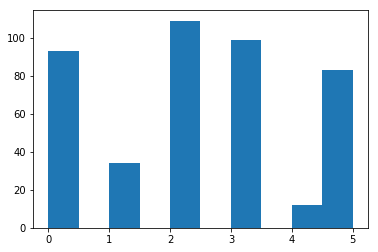

In [22]:
d = result[:,0]
plt.hist(d)

(array([97.,  0., 55.,  0., 89.,  0., 53.,  0., 51., 85.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

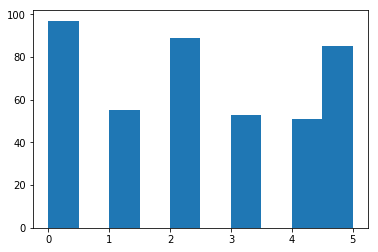

In [23]:
plt.hist(l.numpy())

In [24]:
predicted_class = model(torch.tensor(features_test.values).type((torch.FloatTensor)))
# We will look at the predicted prices to ensure we have something sensible.
predicted_class = predicted_class.data.cpu().max(1, keepdim=True)[1].numpy()[:,0]
predicted_class

array([2, 2, 4, ..., 1, 2, 1])

In [25]:
solution = pd.DataFrame({"ID":id, "class":predicted_class})
solution.to_csv("pokemon_sol.csv", index = False)